In [70]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [71]:
data = pd.read_csv('weight-height.csv')

In [72]:
#label encode the gender to avoid errors
label_encoder = LabelEncoder()
data.Gender = label_encoder.fit_transform(data.Gender)

In [73]:
data.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


removing the relevant columns for clustering

In [74]:

data_for_clustering = data[['Height', 'Weight']]

Standardize the data (important for K-means)

In [75]:

scaler = StandardScaler()
data_for_clustering_scaled = scaler.fit_transform(data_for_clustering)

# kmeans model, setting k = 3

In [76]:
kmeans = KMeans(n_clusters = 3, random_state=42)
kmeans.fit_predict(data_for_clustering_scaled)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 2, 0, ..., 1, 2, 1], dtype=int32)

In [77]:
import matplotlib.pyplot as plt

In [78]:
data

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801
...,...,...,...
9995,0,66.172652,136.777454
9996,0,67.067155,170.867906
9997,0,63.867992,128.475319
9998,0,69.034243,163.852461


In [79]:
data['cluster_label'] = kmeans.labels_

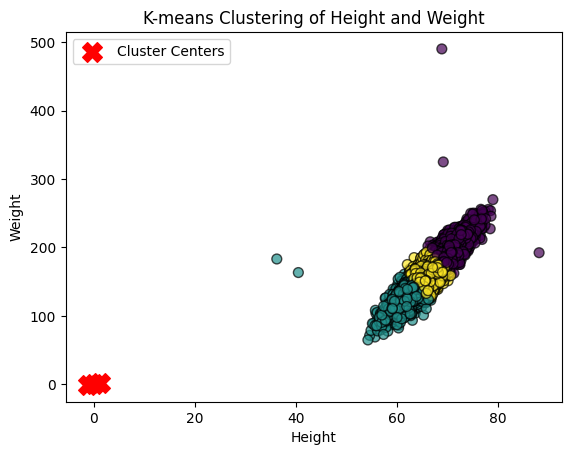

In [80]:
# Visualize the clusters
plt.scatter(data['Height'], data['Weight'], c=data['cluster_label'], cmap='viridis', edgecolor='k', s=50, alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.title('K-means Clustering of Height and Weight')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend()
plt.show()